# Final Project Data Mining - Comparation Accuracy between 5 Algorithm Classification (KNN, Decision Tree, SVM, Random Forest, Naive Bayes) using Titanic Dataset

###### import packages python pandas, numpy, sklearn 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

###### impor dataset titanic, data train

In [2]:
data_train = pd.read_csv('train.csv')
data_train.info()  #total entries 891, if less than number of entry so there're feature instance that's null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### impor dataset titanic, data testing

In [3]:
data_test = pd.read_csv('test.csv')
data_test.info() #total entries 418, if less than number of entry so there're feature instance that's null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


###### tampilkan dataset training

In [4]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### preprocessing data training tahap pertama yaitu me-  delete feature which can be reduce

In [5]:
datatrain_clean = data_train.drop('PassengerId',axis=1).drop('Name',axis=1).drop('Cabin',axis=1).drop('Ticket',axis=1)
datatrain_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


###### preprocessing data training tahap kedua yaitu me- transformation Categorical values into numerical value in feature : Sex, Embarked and scalling value of Age

In [6]:
datatrain_clean['Sex'] = datatrain_clean['Sex'].replace(['male','female'],[0,1])
datatrain_clean['Embarked'] = datatrain_clean['Embarked'].replace(['S','C','Q'],[0,1,2])
datatrain_clean['Age'] = pd.qcut(datatrain_clean['Age'], 10, labels=False)
datatrain_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2.0,1,0,7.2500,0.0
1,1,1,1,7.0,1,0,71.2833,1.0
2,1,3,1,4.0,0,0,7.9250,0.0
3,1,1,1,6.0,1,0,53.1000,0.0
4,0,3,0,6.0,0,0,8.0500,0.0


In [7]:
datatrain_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


###### preprocessing data training tahap ketiga yaitu mentransformasikan data pada feature age dan feature embarked yang jumlahnya < entries dengan metode interpolasi linear

In [8]:
datatrain_clean['Age'] = datatrain_clean['Age'].interpolate(method = 'linear')
datatrain_clean['Embarked'] = datatrain_clean['Embarked'].interpolate(method = 'linear') 
datatrain_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


###### tampilkan dataset testing

In [9]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###### preprocessing data testing tahap pertama yaitu me-  delete feature which can be reduce

In [10]:
datatest_clean = data_test.drop('PassengerId',axis=1).drop('Name',axis=1).drop('Cabin',axis=1).drop('Ticket',axis=1)
datatest_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


###### preprocessing data training tahap kedua yaitu me- transformation Categorical values into numerical value in feature : Sex, Embarked and scalling value of Age

In [11]:
datatest_clean['Sex'] = datatest_clean['Sex'].replace(['male','female'],[0,1])
datatest_clean['Embarked'] = datatest_clean['Embarked'].replace(['S','C','Q'],[0,1,2])
datatest_clean['Age'] = pd.qcut(datatest_clean['Age'], 10, labels=False)
datatest_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,6.0,0,0,7.8292,2
1,3,1,8.0,1,0,7.0000,0
2,2,0,9.0,0,0,9.6875,2
3,3,0,4.0,0,0,8.6625,0
4,3,1,2.0,1,1,12.2875,0


###### preprocessing data testing tahap ketiga yaitu mentransformasikan data pada feature age dan feature embarked yang jumlahnya < entries dengan metode interpolasi linear

In [12]:
datatest_clean['Age'] = datatest_clean['Age'].interpolate(method = 'linear')
datatest_clean['Embarked'] = datatest_clean['Embarked'].interpolate(method = 'linear') 
datatest_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Splitting Data

###### menentukan sumbu x sebagai input, y sebagai output yakni pada feature Survived

In [13]:
x = datatrain_clean.drop('Survived',axis = 1)
y = datatrain_clean['Survived']

###### data training dipecah menjadi datatrain = 80% dan datates = 20%

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

###### diperoleh datatraining yang awalnya sebanyak 891 entries dipecah menjadi datatrain = 712 entries dan datates = 179 entries

In [15]:
x_train.info()
print('--------------------')
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 7 columns):
Pclass      712 non-null int64
Sex         712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null float64
dtypes: float64(3), int64(4)
memory usage: 44.5 KB
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 862 to 448
Data columns (total 7 columns):
Pclass      179 non-null int64
Sex         179 non-null int64
Age         179 non-null float64
SibSp       179 non-null int64
Parch       179 non-null int64
Fare        179 non-null float64
Embarked    179 non-null float64
dtypes: float64(3), int64(4)
memory usage: 11.2 KB


# Definite Model First Classification (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model1 = KNeighborsClassifier()
model1 = model1.fit(x_train, y_train)   # PROSES TRAINING
model1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

###### algorithm = ball_tree, kd_tree, brute-force, auto. Algoritma yang digunakan untuk perhitungan K-NN 
###### leaf_size = Akan berfungsi apabila ball_tree atau kd_tree dipilih. Mempengaruhi kecepatan query data(tergantung memori juga)
###### metric = fungsi minkowski(default). Bisa juga dibuat sendiri
###### metric_params = None. argumen tambahan untuk metric function
###### n_jobs = Jumlah parallel jobs yang digunakan untuk mencari tetangga terdekat. default : single-host, process-based parallelism.
###### n_neighbors = int
###### p = 1 : rumus manhattan distance, 2 : rumus euclidean distance(default)
###### weights = uniform(default) Semua data diberi bobot yang sama. distance : tetangga terdekat memiliki bobot terbesar

# Evaluate First Classification (KNN) Process 

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
model1.score(x_test, y_test)

0.7206703910614525

###### tabel konfusi matriks (untuk kolom menunjukkan prediksi, sedangkan baris menunjukkan data asli)

In [20]:
y_test_predicted = model1.predict(x_test)
conf_model1 = pd.DataFrame(confusion_matrix(y_test,y_test_predicted))
conf_model1.rename(columns={0:'Not Survived', 1:'Survived'},
          index={0:'Not Survived', 1:'Survived'},
          inplace=True)
conf_model1

,Not Survived,Survived
Not Survived,92,14
Survived,36,37


In [21]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       106
           1       0.73      0.51      0.60        73

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.69       179
weighted avg       0.72      0.72      0.71       179



# Definite Model Second Classification (Decision Tree)

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
model2 = tree.DecisionTreeClassifier()
model2 = model2.fit(x_train, y_train)   # PROSES TRAINING
model2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Evaluate Second Classification (Decision Tree) Process 

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
model2.score(x_test, y_test)

0.7821229050279329

In [26]:
y_test_predicted = model2.predict(x_test)
conf_model2 = pd.DataFrame(confusion_matrix(y_test,y_test_predicted))
conf_model2.rename(columns={0:'Not Survived', 1:'Survived'},
          index={0:'Not Survived', 1:'Survived'},
          inplace=True)
conf_model2

,Not Survived,Survived
Not Survived,94,12
Survived,27,46


In [27]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.79      0.63      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



# Definite Model Third Classification (SVM)

In [28]:
from sklearn import svm

In [29]:
model3 = svm.SVC(C=2, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', 
                 kernel='linear', max_iter=-1, probability=True, random_state=None, shrinking=True, 
                 tol=0.001, verbose=False)
model3 = model3.fit(x_train, y_train)   # PROSES TRAINING
model3

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Evaluate Third Classification (SVM) Process 

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
model3.score(x_test, y_test)

0.776536312849162

In [32]:
y_test_predicted = model3.predict(x_test)
conf_model3 = pd.DataFrame(confusion_matrix(y_test,y_test_predicted))
conf_model3.rename(columns={0:'Not Survived', 1:'Survived'},
          index={0:'Not Survived', 1:'Survived'},
          inplace=True)
conf_model3

,Not Survived,Survived
Not Survived,90,16
Survived,24,49


In [33]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



# Definite Model Fourth Classification (Random Forest)

In [34]:
from sklearn.ensemble.forest import RandomForestClassifier

In [35]:
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)

C:\Users\feris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluate Fourth Classification (Random Forest) Process 

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
model4.score(x_test, y_test)

0.7541899441340782

In [38]:
y_test_predicted = model4.predict(x_test)
conf_model4 = pd.DataFrame(confusion_matrix(y_test,y_test_predicted))
conf_model4.rename(columns={0:'Not Survived', 1:'Survived'},
          index={0:'Not Survived', 1:'Survived'},
          inplace=True)
conf_model4

,Not Survived,Survived
Not Survived,92,14
Survived,30,43


In [39]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       106
           1       0.75      0.59      0.66        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



# Definite Model Fifth Classification (Naive Bayes)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model5 = GaussianNB()
model5.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Evaluate Fifth Classification (Naive Bayes) Process 

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
model5.score(x_test, y_test)

0.7597765363128491

In [44]:
y_test_predicted = model5.predict(x_test)
conf_model5 = pd.DataFrame(confusion_matrix(y_test,y_test_predicted))
conf_model5.rename(columns={0:'Not Survived', 1:'Survived'},
          index={0:'Not Survived', 1:'Survived'},
          inplace=True)
conf_model5

,Not Survived,Survived
Not Survived,89,17
Survived,26,47


In [45]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.73      0.64      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



# Create ROC Curve

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [47]:
# Get predicted probabilities
y_score1 = model1.predict_proba(x_test)[:,1]
y_score2 = model2.predict_proba(x_test)[:,1]
y_score3 = model3.predict_proba(x_test)[:,1]
y_score4 = model4.predict_proba(x_test)[:,1]
y_score5 = model5.predict_proba(x_test)[:,1]

In [48]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score5))

roc_auc_score for KNN:  0.7237658309640734
roc_auc_score for Decision Tree:  0.7650555699147067
roc_auc_score for SVM:  0.8339364176789867
roc_auc_score for Random Forest:  0.8481519772551047
roc_auc_score for Naive Bayes:  0.791548203670199


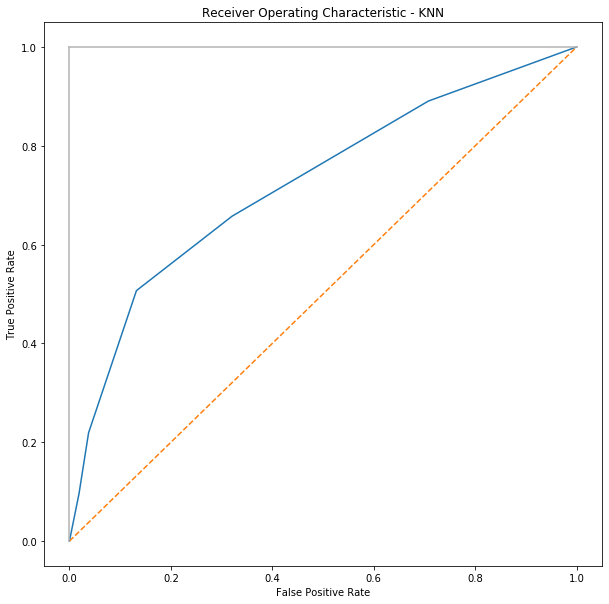

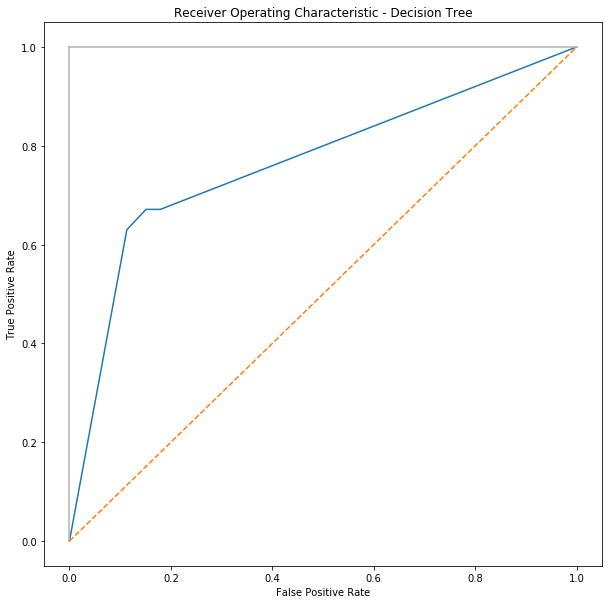

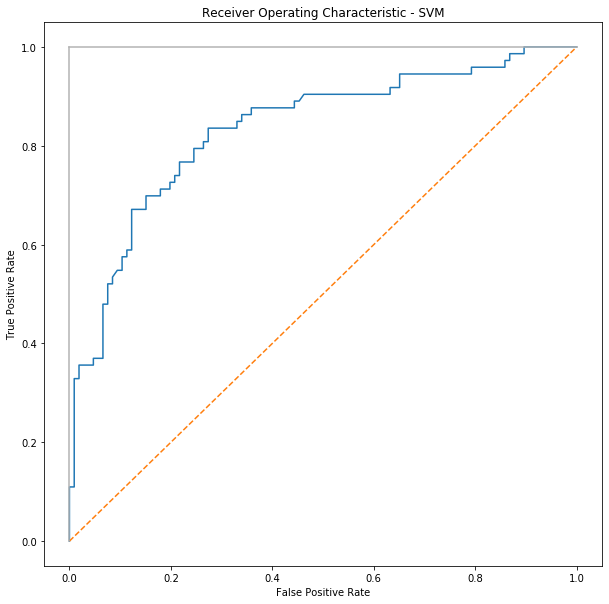

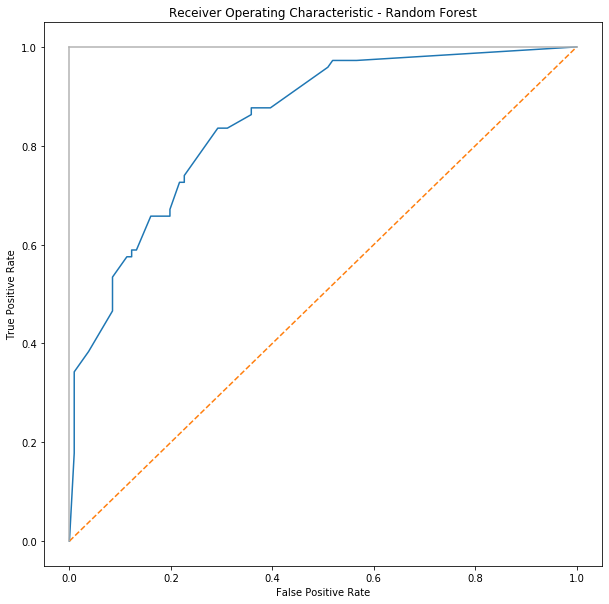

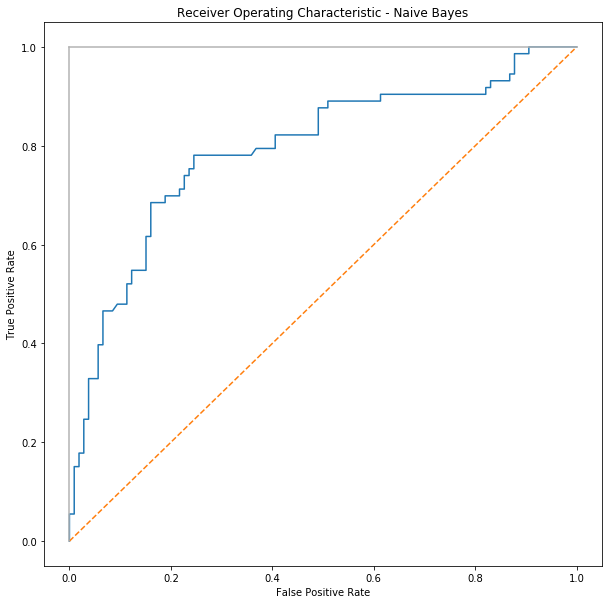

In [49]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_model1 = roc_auc_score(y_test, y_score1)
print('AUC Model KNN: %.2f' % auc_model1)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_model2 = roc_auc_score(y_test, y_score2)
print('AUC Model Decision Tree: %.2f' % auc_model2)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_model3 = roc_auc_score(y_test, y_score3)
print('AUC Model SVM: %.2f' % auc_model3)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_model4 = roc_auc_score(y_test, y_score4)
print('AUC Model Random Forest: %.2f' % auc_model4)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_model5 = roc_auc_score(y_test, y_score5)
print('AUC Model Naive Bayes: %.2f' % auc_model5)

AUC Model KNN: 0.72
AUC Model Decision Tree: 0.77
AUC Model SVM: 0.83
AUC Model Random Forest: 0.85
AUC Model Naive Bayes: 0.79
